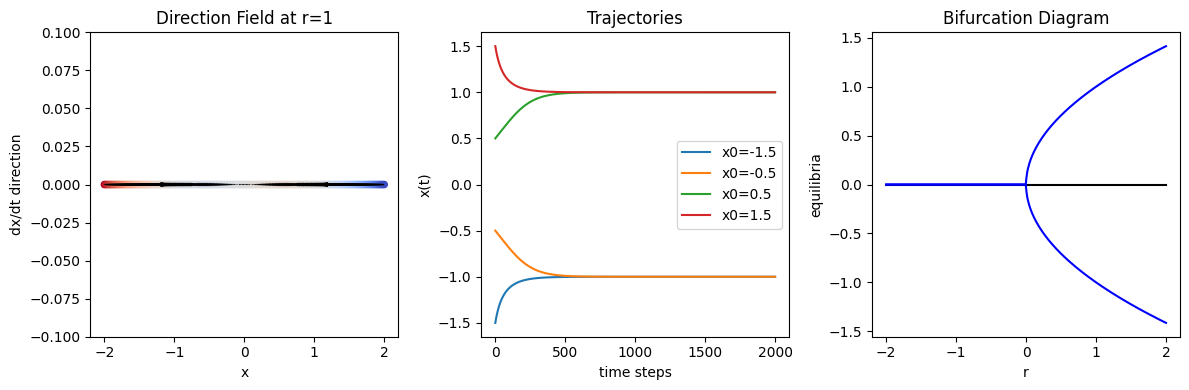

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define the ODE dx/dt = r*x - x^3
def f(x, r):
    return r*x - x**3

# simple rk4 solver
def rk4(x0, r, T=10, N=2000):
    dt = T/N
    x = np.zeros(N)
    x[0] = x0
    for i in range(1,N):
        k1 = f(x[i-1], r)
        k2 = f(x[i-1] + 0.5*dt*k1, r)
        k3 = f(x[i-1] + 0.5*dt*k2, r)
        k4 = f(x[i-1] + dt*k3, r)
        x[i] = x[i-1] + dt*(k1 + 2*k2 + 2*k3 + k4)/6
    return x

# set parameter for direction field and trajectories
r = 1
x_vals = np.linspace(-2,2,200)
slopes = f(x_vals, r)

# plot direction field
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(x_vals, np.zeros_like(x_vals), c=slopes, cmap='coolwarm', s=20)
plt.quiver(x_vals, np.zeros_like(x_vals), slopes, np.zeros_like(slopes), angles='xy', scale=20)
plt.title("Direction Field at r=1")
plt.xlabel("x")
plt.ylabel("dx/dt direction")
plt.ylim(-0.1,0.1)

# plot trajectories
plt.subplot(1,3,2)
initial_conditions = [-1.5, -0.5, 0.5, 1.5]
for x0 in initial_conditions:
    traj = rk4(x0, r)
    plt.plot(traj, label=f"x0={x0}")
plt.title("Trajectories")
plt.xlabel("time steps")
plt.ylabel("x(t)")
plt.legend()

# plot bifurcation diagram
plt.subplot(1,3,3)
r_vals = np.linspace(-2,2,400)
x0 = np.zeros_like(r_vals)
x_pos = np.sqrt(np.maximum(r_vals,0))
x_neg = -x_pos
plt.plot(r_vals, x0, 'k')
plt.plot(r_vals, x_pos, 'b')
plt.plot(r_vals, x_neg, 'b')
plt.title("Bifurcation Diagram")
plt.xlabel("r")
plt.ylabel("equilibria")

plt.tight_layout()
plt.show()


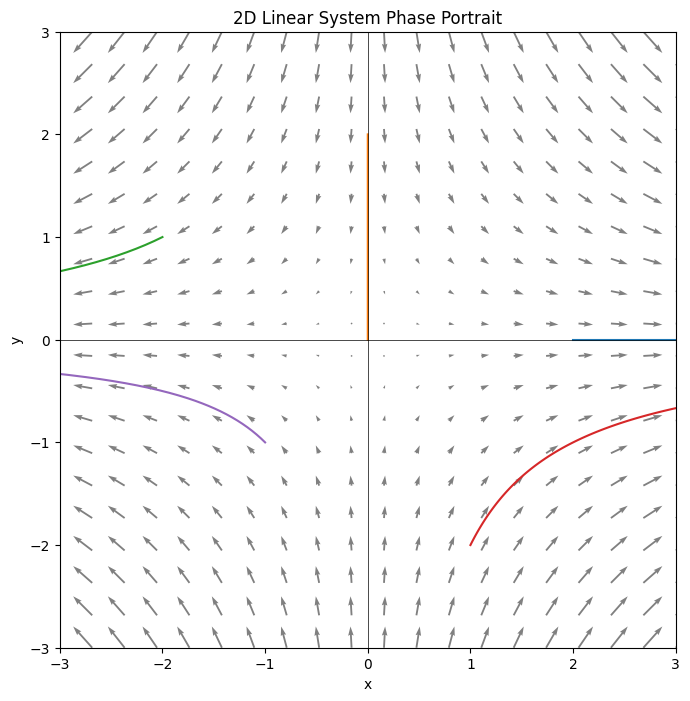

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# define the 2D linear system dx/dt = A x
def system(X, A):
    x, y = X
    dx = A[0,0]*x + A[0,1]*y
    dy = A[1,0]*x + A[1,1]*y
    return np.array([dx, dy])

# runge-kutta solver
def rk4_2d(X0, A, T=10, N=2000):
    dt = T/N
    X = np.zeros((N,2))
    X[0] = X0
    for i in range(1,N):
        k1 = system(X[i-1], A)
        k2 = system(X[i-1] + 0.5*dt*k1, A)
        k3 = system(X[i-1] + 0.5*dt*k2, A)
        k4 = system(X[i-1] + dt*k3, A)
        X[i] = X[i-1] + dt*(k1 + 2*k2 + 2*k3 + k4)/6
    return X

# choose A matrix type (change this manually to see each behaviour)
# stable spiral
#A = np.array([[-1, -4],[4, -1]])

# unstable spiral
#A = np.array([[1, -4],[4, 1]])

# stable node
#A = np.array([[-2, 0],[0, -1]])

# unstable node
#A = np.array([[2, 0],[0, 1]])

# saddle
A = np.array([[2,0],[0,-2]])

# phase plane grid
x = np.linspace(-3,3,20)
y = np.linspace(-3,3,20)
X, Y = np.meshgrid(x, y)

U = A[0,0]*X + A[0,1]*Y
V = A[1,0]*X + A[1,1]*Y

plt.figure(figsize=(8,8))
plt.quiver(X, Y, U, V, color='gray')

# sample trajectories
ics = [[2,0],[0,2],[-2,1],[1,-2],[-1,-1]]
for ic in ics:
    sol = rk4_2d(np.array(ic), A)
    plt.plot(sol[:,0], sol[:,1])

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.title("2D Linear System Phase Portrait")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.gca().set_aspect('equal')
plt.show()

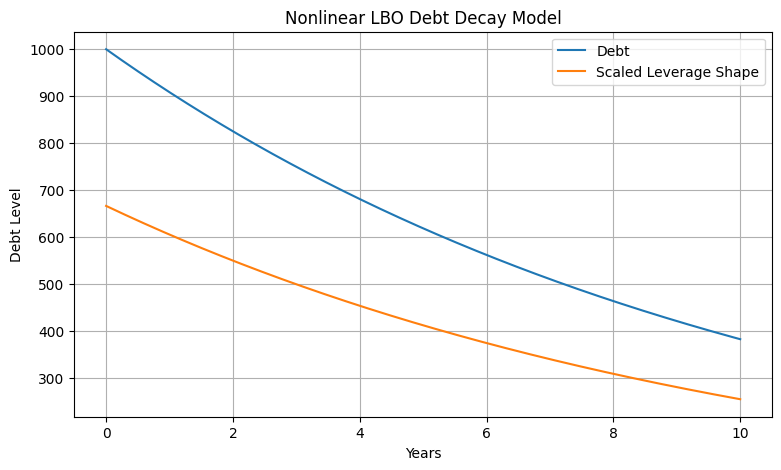

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
Debt0 = 1000       # initial debt (million)
FCF = 120          # annual free cash flow used for debt paydown
paydown_rate = 0.8 # proportion of FCF allocated to debt service
T = 10             # total years
N = 2000           # time steps

# ODE system: nonlinear debt decay
def dDebt_dt(D):
    return - paydown_rate * FCF * (D / Debt0)

# RK4 solver
def rk4(D0, T, N):
    dt = T/N
    D = np.zeros(N)
    D[0] = D0
    t = np.linspace(0, T, N)
    for i in range(1, N):
        k1 = dDebt_dt(D[i-1])
        k2 = dDebt_dt(D[i-1] + 0.5*dt*k1)
        k3 = dDebt_dt(D[i-1] + 0.5*dt*k2)
        k4 = dDebt_dt(D[i-1] + dt*k3)
        D[i] = D[i-1] + dt*(k1 + 2*k2 + 2*k3 + k4)/6
    return t, D

# run model
t, Debt = rk4(Debt0, T, N)

# implied leverage multiple (EV constant for simplicity)
EV = 1500
Leverage = Debt / EV

# plotting
plt.figure(figsize=(9,5))
plt.plot(t, Debt, label="Debt")
plt.plot(t, Leverage*Debt0, label="Scaled Leverage Shape")

plt.xlabel("Years")
plt.ylabel("Debt Level")
plt.title("Nonlinear LBO Debt Decay Model")
plt.grid(True)
plt.legend()
plt.show()